In [2]:
# -----------------------------------------------------------
# Penguin 種 (Adélie / Chinstrap / Gentoo) を分類する決定木
# -----------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
# 1. データ読込（seaborn は GitHub から DL するため要ネット）
penguins = sns.load_dataset("penguins")

# 欠損を単純にドロップ
penguins = penguins.dropna()

# 特徴量と目的変数
feature_cols = ["bill_length_mm", "bill_depth_mm",
                "flipper_length_mm", "body_mass_g"]
X = penguins[feature_cols]
y = penguins["species"]          # 3 クラス文字列


In [4]:
# 2. 学習用 / テスト用に分割（層化）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [5]:
# 3. 決定木モデル
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [7]:
y_dt_prob_train = clf.predict_proba(X_train)
thr = 0.5
y_dt_pred_train = (y_dt_prob_train >= thr).astype(int)
y_dt_pred_train

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0,

In [10]:
clf.predict(X_test)

array(['Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie'], dtype=object)

In [ ]:
# 4. 評価
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test  accuracy:", accuracy_score(y_test, clf.predict(X_test)))

# 混同行列
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
print("\nConfusion matrix\n", cm_df)

Train accuracy: 0.9736842105263158
Test  accuracy: 0.9402985074626866

Confusion matrix
            Adelie  Chinstrap  Gentoo
Adelie         28          1       0
Chinstrap       1         13       0
Gentoo          0          2      22


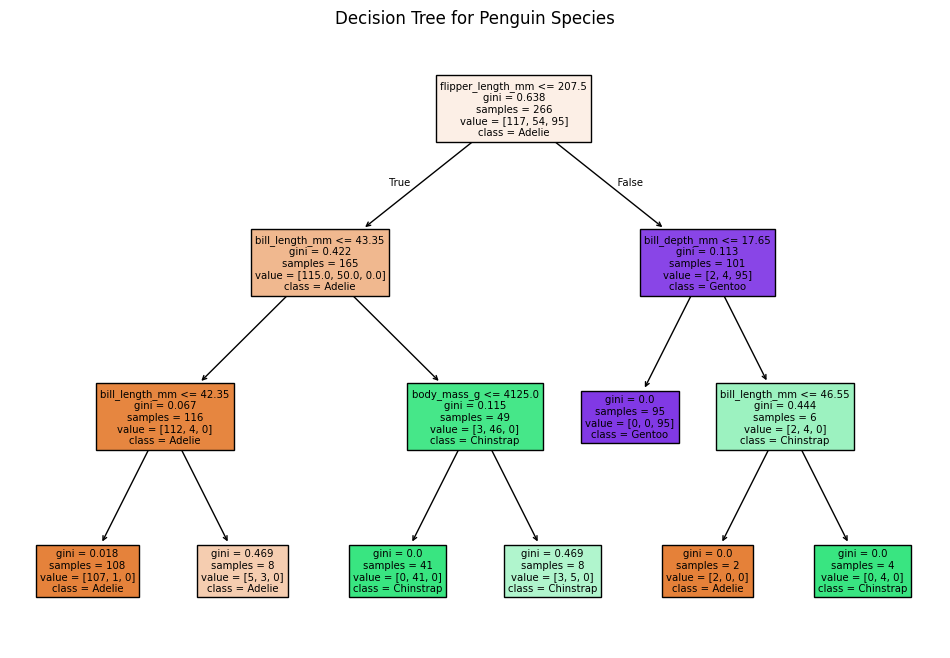

In [1]:
# 5. 可視化
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_cols,
          class_names=clf.classes_, filled=True)
plt.title("Decision Tree for Penguin Species")
plt.show()